# We will write our code here. So, everyone can see.

# Install and Import libaraies 

In [1]:
# Install libraries
!pip3 install python-whois

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 109 kB 6.4 MB/s 
  Created wheel for python-whois: filename=python_whois-0.8.0-py3-none-any.whl size=103262 sha256=ed8ec246f4224c08340ec6e5e7caa8c6b1326c7488a51c21592c8b9c47cccc8a
  Stored in directory: /root/.cache/pip/wheels/24/20/6b/5550a3d6bef09ddaed74eb84006fc3d53f94867f1916794df4
Successfully built python-whois


In [2]:
# Import libraries
import numpy as np
import pandas as pd
from google.colab import drive
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import GenericUnivariateSelect
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn import metrics
import matplotlib.pyplot as plt
import whois
import datetime
import seaborn as sns
import re
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Load Data

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# import the dataset
DF = pd.read_csv('/content/drive/MyDrive/CN7050/coursework_data.csv')

print(DF)

                     Domain  category
0        noriomatsumoto.com         1
1          haplessmales.com         1
2       shivamchatuvedi.com         1
3     dailyfreebieoffer.com         1
4             poniemall.com         1
...                     ...       ...
9995           citymark.com         5
9996         offroading.com         5
9997              cevon.com         5
9998           mozzilla.com         5
9999              stemz.com         5

[10000 rows x 2 columns]


# Features Extraction

In [5]:
# Extrat lens of the domain 
DF['Length'] = DF['Domain'].astype(str).str.len()

# Extract special characters from the domians
DF["Special_chars"] = DF.apply(lambda p: sum(not q.isalpha() and not q.isdigit() for q in p["Domain"]), axis=1)

# Extrct letters from the domains including Uppercase and Lowercase
DF["Letters"] = DF.apply(lambda p: sum(q.isalpha() for q in p["Domain"]), axis=1)
DF['Upper_case'] = DF.apply(lambda p: sum(q.isupper() for q in p['Domain']), axis=1)
DF['Lower_case'] = DF.apply(lambda p: sum(q.islower() for q in p['Domain']), axis=1)

# Separate the letters to vowels and consonants
DF['Vowels'] = DF.Domain.str.lower().str.count(r'[aeiou]')
DF['Consonants'] = DF.Domain.str.lower().str.count(r'[a-z]') - DF['Vowels']

# Extract numbers from the domains
DF["Numbers"] = DF.apply(lambda p: sum(q.isdigit() for q in p["Domain"]), axis=1)

DF.head(100)

,Domain,category,Length,Special_chars,Letters,Upper_case,Lower_case,Vowels,Consonants,Numbers
0,noriomatsumoto.com,1,18,1,17,0,17,8,9,0
1,haplessmales.com,1,16,1,15,0,15,5,10,0
2,shivamchatuvedi.com,1,19,1,18,0,18,7,11,0
3,dailyfreebieoffer.com,1,21,1,20,0,20,9,11,0
4,poniemall.com,1,13,1,12,0,12,5,7,0
...,...,...,...,...,...,...,...,...,...,...
95,purewhitekidneybeans.com,1,24,1,23,0,23,9,14,0
96,yq83738128.com,1,14,1,5,0,5,1,4,8
97,cc549888.com,1,12,1,5,0,5,1,4,6
98,oatzone.com,1,11,1,10,0,10,5,5,0


In [6]:
# Create the function to perform the extraction and use it with the fucntions down below.
def perform_whois(Domain):
    try:
        re = whois.whois(Domain)
        return re
    except Exception:
        return False

In [7]:
# Create a function to extract the register date from the domains.
def check_registered_date(re):
    if(re!=False):
        RD = re.creation_date
        if((RD is not None) and (type(RD)!=str)):
            if(type(RD)==list):
                RD=RD[0]
            TD = datetime.datetime.now()
            days = (TD-RD).days
            return days
        else:
            return 0
    else:
        return 0

In [8]:
# Create the fucntion to extract the expire date from the domains.
def check_expiration_date(re):
    if(re!=False):
        ED = re.expiration_date
        if((ED is not None) and (type(ED)!=str)):
            if(type(ED)==list):
                ED = ED[0]
            TD = datetime.datetime.now()
            days = (TD-ED).days
            return days
        else:
            return 0
    else:
        return 0

In [9]:
# Create the function to extrct the update date from the domains.
def check_updated_date(re):
    if(re!=False):
        UDD = re.updated_date
        if((UDD is not None) and (type(UDD)!=str)):
            if(type(UDD)==list):
                UDD = UDD[0]
            TD = datetime.datetime.now()
            days = (TD-UDD).days
            return days
        else:
            return 0
    else:
        return 0

In [10]:
# Crrate the function that can extract all thress fucntions above at the same time.
registered_date = []
expiration_date = []
updated_date = []

def extract_features():
    counter = 0
    for domain in DF['Domain']:
        counter = counter + 1
        print(counter)
        whois_result = perform_whois(domain)
        registered_date.append(check_registered_date(whois_result))
        expiration_date.append(check_expiration_date(whois_result))
        updated_date.append(check_updated_date(whois_result))

In [11]:
# extract features
extract_features()

Streaming output truncated to the last 5000 lines.
5005
5006
5007
5008
5009
5010
5011
5012
5013
5014
5015
5016
5017
5018
5019
5020
5021
5022
5023
5024
5025
5026
5027
5028
5029
5030
5031
5032
5033
5034
5035
5036
5037
5038
5039
5040
5041
5042
5043
5044
5045
5046
5047
5048
5049
5050
5051
5052
5053
5054
5055
5056
5057
5058
5059
5060
5061
5062
5063
5064
5065
5066
5067
5068
5069
5070
5071
5072
5073
5074
5075
5076
5077
5078
5079
5080
5081
5082
5083
5084
5085
5086
5087
5088
5089
5090
5091
5092
5093
5094
5095
5096
5097
5098
5099
5100
5101
5102
5103
5104
5105
5106
5107
5108
5109
5110
5111
5112
5113
5114
5115
5116
5117
5118
5119
5120
5121
5122
5123
5124
5125
5126
5127
5128
5129
5130
5131
5132
5133
5134
5135
5136
5137
5138
5139
5140
5141
5142
5143
5144
5145
5146
5147
5148
5149
5150
5151
5152
5153
5154
5155
5156
5157
5158
5159
5160
5161
5162
5163
5164
5165
5166
5167
5168
5169
5170
5171
5172
5173
5174
5175
5176
5177
5178
5179
5180
5181
5182
5183
5184
5185
5186
5187
5188
5189
5190
5191
5192
5193
5194

In [12]:
# Add the the feature that we extracted to dataset.
DF['reg_Date'] = registered_date
DF['exp_Date'] = expiration_date
DF['updated_Date'] = updated_date

DF.head()

,Domain,category,Length,Special_chars,Letters,Upper_case,Lower_case,Vowels,Consonants,Numbers,reg_Date,exp_Date,updated_Date
0,noriomatsumoto.com,1,18,1,17,0,17,8,9,0,329,-36,329
1,haplessmales.com,1,16,1,15,0,15,5,10,0,0,0,0
2,shivamchatuvedi.com,1,19,1,18,0,18,7,11,0,0,0,0
3,dailyfreebieoffer.com,1,21,1,20,0,20,9,11,0,0,0,0
4,poniemall.com,1,13,1,12,0,12,5,7,0,0,0,0


# Data Pre - Processing

In [13]:
# Use one-hot encoding to covert string column to numeric 
domian_encoder = OneHotEncoder()
domian_encoder = domian_encoder.fit_transform(DF.Domain.values.reshape(-1,1)).toarray()
OneHot = pd.DataFrame(domian_encoder, columns = ["Domain_"+str(int(i)) for i in range(domian_encoder.shape[1])])

# Add the string tranformed to dataset 
DF = pd.concat([DF, OneHot], axis=1)
DF = DF.drop('Domain', axis=1)
DF.head(100)

,category,Length,Special_chars,Letters,Upper_case,Lower_case,Vowels,Consonants,Numbers,reg_Date,...,Domain_9990,Domain_9991,Domain_9992,Domain_9993,Domain_9994,Domain_9995,Domain_9996,Domain_9997,Domain_9998,Domain_9999
0,1,18,1,17,0,17,8,9,0,329,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,16,1,15,0,15,5,10,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,19,1,18,0,18,7,11,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,21,1,20,0,20,9,11,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,13,1,12,0,12,5,7,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,24,1,23,0,23,9,14,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
96,1,14,1,5,0,5,1,4,8,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97,1,12,1,5,0,5,1,4,6,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
98,1,11,1,10,0,10,5,5,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
# Spllt the data to X and Y
x = DF.drop('category', axis=1)
y = DF['category']

print("X = ","\n", x)
print('-----------------------------------------------------------------')
print("Y = ","\n", y)

X =  
       Length  Special_chars  Letters  Upper_case  Lower_case  Vowels  \
0         18              1       17           0          17       8   
1         16              1       15           0          15       5   
2         19              1       18           0          18       7   
3         21              1       20           0          20       9   
4         13              1       12           0          12       5   
...      ...            ...      ...         ...         ...     ...   
9995      12              1       11           0          11       3   
9996      14              1       13           0          13       5   
9997       9              1        8           0           8       3   
9998      12              1       11           0          11       4   
9999       9              1        8           0           8       2   

      Consonants  Numbers  reg_Date  exp_Date  ...  Domain_9990  Domain_9991  \
0              9        0       329       -36  .

In [15]:
# Perform feature selection.
transform = GenericUnivariateSelect(mode="fpr")
gus = transform.fit_transform(x,y)

print(gus)

/usr/local/lib/python3.8/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [3] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


[[ 1.800e+01  1.000e+00  1.700e+01 ...  3.290e+02 -3.600e+01  3.290e+02]
 [ 1.600e+01  1.000e+00  1.500e+01 ...  0.000e+00  0.000e+00  0.000e+00]
 [ 1.900e+01  1.000e+00  1.800e+01 ...  0.000e+00  0.000e+00  0.000e+00]
 ...
 [ 9.000e+00  1.000e+00  8.000e+00 ...  6.176e+03 -1.859e+03  1.523e+03]
 [ 1.200e+01  1.000e+00  1.100e+01 ...  7.323e+03 -3.470e+02  4.160e+02]
 [ 9.000e+00  1.000e+00  8.000e+00 ...  6.608e+03 -3.310e+02  3.400e+01]]


In [154]:
# Spilt X and Y to train and test the dataset.
x_train, x_test, y_train, y_test = train_test_split(gus, y, test_size = 0.3, stratify=y, random_state=0)

print('xTrain is\n', x_train, '\n', 'yTrain is\n', y_train)
print('-----------------------------------------------------------------')
print('xTest is\n', x_test,'\n', 'yTest is\n', y_test)

xTrain is
 [[ 2.200e+01  1.000e+00  2.100e+01 ...  4.720e+02 -2.580e+02  1.060e+02]
 [ 1.200e+01  1.000e+00  1.100e+01 ...  5.130e+02 -2.170e+02  1.850e+02]
 [ 1.700e+01  1.000e+00  1.600e+01 ...  6.248e+03 -3.260e+02  5.300e+01]
 ...
 [ 1.000e+01  1.000e+00  3.000e+00 ...  5.440e+02 -1.860e+02  1.620e+02]
 [ 1.600e+01  1.000e+00  1.500e+01 ...  0.000e+00  0.000e+00  0.000e+00]
 [ 1.200e+01  1.000e+00  1.100e+01 ...  3.763e+03 -2.540e+02  1.420e+02]] 
 yTrain is
 1854    1
465     1
8707    3
853     1
4906    1
       ..
5793    1
4815    1
2498    1
4743    1
6757    2
Name: category, Length: 7000, dtype: int64
-----------------------------------------------------------------
xTest is
 [[ 1.200e+01  1.000e+00  1.100e+01 ...  4.230e+02 -3.070e+02  6.200e+01]
 [ 1.400e+01  1.000e+00  1.300e+01 ...  2.600e+03 -3.220e+02  2.100e+01]
 [ 1.500e+01  1.000e+00  1.400e+01 ...  5.510e+02 -1.790e+02  7.100e+01]
 ...
 [ 1.800e+01  1.000e+00  1.700e+01 ...  3.946e+03 -8.030e+02  8.100e+01]
 [ 1.1

In [155]:
# Tranform the dataset to a common standad scale by using the Standard Scaler
standardscaler = StandardScaler()
x_train = standardscaler.fit_transform(x_train)
x_test = standardscaler.transform(x_test)

print('xTrain after scalar is\n', x_train)
print('-----------------------------------------------------------------')
print('xTest after scalar is\n', x_test)

xTrain after scalar is
 [[ 1.22916764 -0.20750887  1.23550236 ... -0.58905595 -0.11805203
   0.0863268 ]
 [-0.77707516 -0.20750887 -0.64436473 ... -0.57601278 -0.0202439
   0.45943716]
 [ 0.22604624 -0.20750887  0.29556882 ...  1.24844121 -0.28027039
  -0.16398773]
 ...
 [-1.17832372 -0.20750887 -2.1482584  ... -0.56615086  0.05370859
   0.35081009]
 [ 0.02542196 -0.20750887  0.10758211 ... -0.73921154  0.49742352
  -0.41430227]
 [-0.77707516 -0.20750887 -0.64436473 ...  0.4578975  -0.10850977
   0.25635177]]
-----------------------------------------------------------------
xTest after scalar is
 [[-0.77707516 -0.20750887 -0.64436473 ... -0.60464414 -0.23494467
  -0.12148149]
 [-0.3758266  -0.20750887 -0.26839131 ...  0.08791669 -0.27072813
  -0.31512104]
 [-0.17520232 -0.20750887 -0.0804046  ... -0.56392398  0.07040754
  -0.07897525]
 ...
 [ 0.42667052 -0.20750887  0.48355553 ...  0.51611461 -1.41818447
  -0.03174609]
 [-0.97769944 -0.20750887 -0.83235144 ... -0.67558629  0.10380544
 

# Make Prediction

In [169]:
# Make prediction without parameters using K-Fold and Cross-Validation.
mlModels = []
mlModels.append(('KNN', KNeighborsClassifier()))
mlModels.append(('Random Forest', RandomForestClassifier()))
mlModels.append(('Decision Tree', DecisionTreeClassifier()))

models = []
results = []

for name, model in mlModels:
  kFold = KFold(n_splits=15, shuffle = True, random_state=123) 
  cvsResults = cross_val_score(model, x_train, y_train, cv=kFold, scoring='accuracy')
  results.append(cvsResults)
  models.append(name)
  print("%s: %f (%f)" % (name, cvsResults.mean(), cvsResults.std()))

KNN: 0.758289 (0.008566)
Random Forest: 0.778432 (0.014023)
Decision Tree: 0.731864 (0.013608)


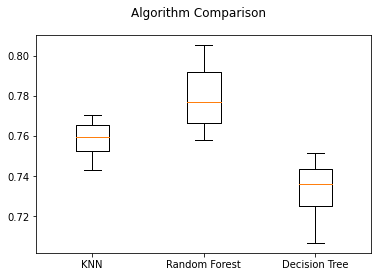

In [170]:
# Visualisation for the K-Fold and Cross-Validation
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(models)
plt.show()

In [171]:
# Check the k-values that have the lowest error 
def k_value_error():
  error_rate=[]
  for i in range (1,31): 
    clf=KNeighborsClassifier(n_neighbors=i)
    clf.fit(x_train,y_train)
    predict_i=clf.predict(x_test)
    error_rate.append(np.mean(predict_i!=y_test))
    error_rate
    k_value = error_rate.index(min(error_rate)) + 1 
  
# Plotting the error rate vs k range
  plt.figure(figsize=(12,6))
  plt.plot(range(1,31),error_rate,marker="o",markerfacecolor="red",
            linestyle="solid",color="green",markersize=15)
  plt.title("Error rate vs k value",fontsize=20)
  plt.xlabel("k-values",fontsize=20)
  plt.ylabel("error rate",fontsize=20)
  plt.xticks(range(1,31))
  plt.show()
  return k_value

In [172]:
# Check the max_depth that have the lowest error 
def m_max_depth_for_RF():
  error_rate=[]
  for m in range (1,31): 
    dtm=DecisionTreeClassifier(max_depth=m)
    dtm.fit(x_train,y_train)
    predict_i=dtm.predict(x_test)
    error_rate.append(np.mean(predict_i!=y_test))
    error_rate
    depth = error_rate.index(min(error_rate)) + 1 
  
# Plotting the error rate vs max depth
  plt.figure(figsize=(12,6))
  plt.plot(range(1,31),error_rate,marker="o",markerfacecolor="yellow",
          linestyle="solid",color="darkblue",markersize=15)
  plt.title("Error rate vs max depth for random forest",fontsize=20)
  plt.xlabel("max_depth",fontsize=20)
  plt.ylabel("error rate",fontsize=20)
  plt.xticks(range(1,31))
  plt.show()
  return depth

In [173]:
def m_max_depth_for_DT():
  error_rate=[]
  for m in range (1,31): 
    dtm=DecisionTreeClassifier(max_depth=m)
    dtm.fit(x_train,y_train)
    predict_i=dtm.predict(x_test)
    error_rate.append(np.mean(predict_i!=y_test))
    error_rate
    depth = error_rate.index(min(error_rate)) + 1 
  
# Plotting the error rate vs max depth
  plt.figure(figsize=(12,6))
  plt.plot(range(1,31),error_rate,marker="o",markerfacecolor="green",
          linestyle="solid",color="brown",markersize=15)
  plt.title("Error rate vs max depth for decision tree",fontsize=20)
  plt.xlabel("max_depth",fontsize=20)
  plt.ylabel("error rate",fontsize=20)
  plt.xticks(range(1,31))
  plt.show()
  return depth

In [174]:
# Defind the K-Nearest Neighbours with parameters as a function to make a prediction. Also, make it easy to compare with other clssifications.
def KNN_result(k_value_error):
  knn = KNeighborsClassifier(n_neighbors=k_value_error)
  knn_model = knn.fit(x_train,y_train)
  y_pred = knn_model.predict(x_test)
  ac = accuracy_score(y_test, y_pred)
  conf = confusion_matrix(y_test, y_pred)
  accuracy = classification_report(y_test, y_pred)
  result = {"accuracy":accuracy, "ac":ac, "confusion matrix":conf}
  return result

In [175]:
# Defind the Random Forest with parameters as a function to make a prediction. Also, make it easy to compare with other clssifications.
def RF_result(m_max_depth_for_RF):
  rf = RandomForestClassifier(max_depth=m_max_depth_for_RF,random_state=0)
  rf_model = rf.fit(x_train, y_train)
  y_pred = rf_model.predict(x_test)
  ac = accuracy_score(y_test, y_pred)
  conf = confusion_matrix(y_test, y_pred)
  accuracy = classification_report(y_test, y_pred, zero_division=1)
  result = {"accuracy":accuracy, "ac":ac, "confusion matrix":conf}
  return result 

In [176]:
# Defind the Decision Tree with parameters as a function to make a prediction. Also, make it easy to compare with other clssifications.
def DT_result(m_max_depth_for_DT):
  dt = DecisionTreeClassifier(max_depth=m_max_depth_for_DT)
  dt_model = dt.fit(x_train,y_train)
  y_pred = dt_model.predict(x_test)  
  ac = accuracy_score(y_test, y_pred)
  conf = confusion_matrix(y_test, y_pred)
  accuracy = classification_report(y_test, y_pred, zero_division=1)
  result = {"accuracy":accuracy, "ac":ac, "confusion matrix":conf}
  return result 

In [177]:
# Defind function to extract all the result from the classification functions above.
def classification_results():
    results = {}
    knn = KNN_result(k_value_error())
    rf = RF_result(m_max_depth_for_RF())
    dt = DT_result(m_max_depth_for_DT())
    results = {"K-Nearset Neighbors":knn,
               "Random Forest":rf,
               "Decision Tree":dt
               }
    return results

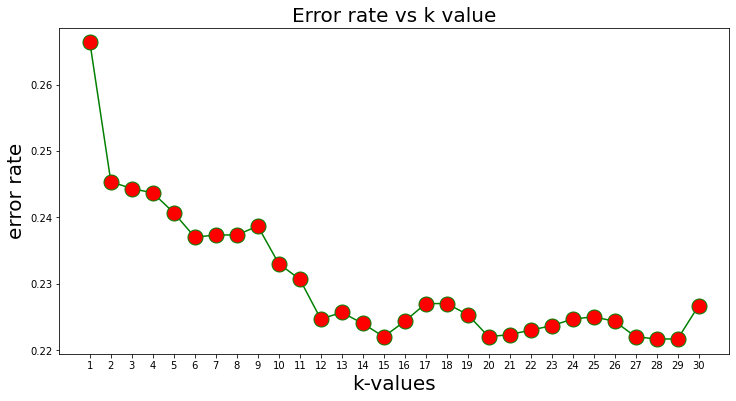

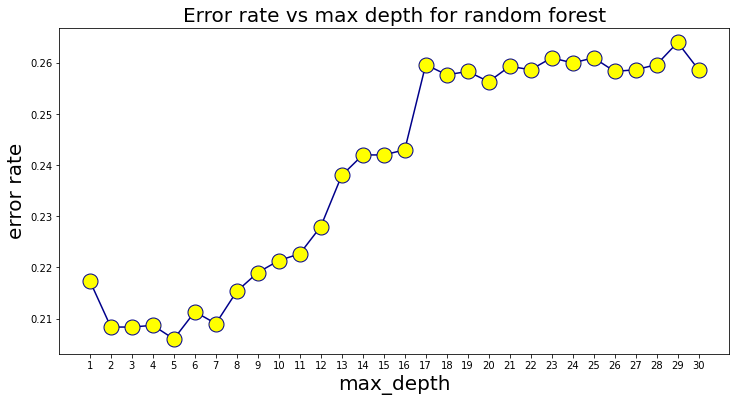

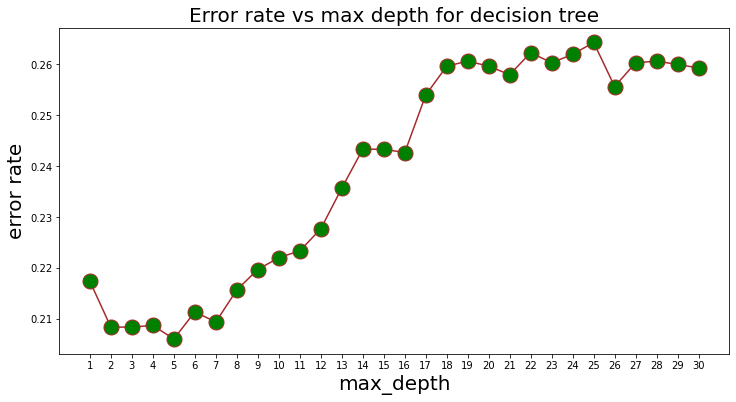

In [178]:
# Show the result of classification with parameters
classification_results = classification_results()

In [179]:
# Print out the classification results
print("----------Accuracy----------")
for k,r in classification_results.items():
    print(f"{k}: {r['ac']*100}","%")
print("\n----------Confusion matrix-----------")
for k,r in classification_results.items():
     print(f"{k}:\n {r['confusion matrix']}")
print("\n----------Classification Report----------")
for k,r in classification_results.items():
     print(f"{k}:\n {r['accuracy']}",'%')

----------Accuracy----------
K-Nearset Neighbors: 77.83333333333333 %
Random Forest: 79.26666666666667 %
Decision Tree: 79.4 %

----------Confusion matrix-----------
K-Nearset Neighbors:
 [[1783   17    0    0    0]
 [  75  487   22    4   12]
 [  37  228   18    6   11]
 [   7  114   12    3   14]
 [  10   75   11   10   44]]
Random Forest:
 [[1782   18    0    0    0]
 [  35  556    0    0    9]
 [  12  281    0    0    7]
 [   3  140    0    0    7]
 [   4  106    0    0   40]]
Decision Tree:
 [[1782   18    0    0    0]
 [  32  531   11    8   18]
 [   9  261    6    7   17]
 [   3  113    2    8   24]
 [   4   79    0   12   55]]

----------Classification Report----------
K-Nearset Neighbors:
               precision    recall  f1-score   support

           1       0.93      0.99      0.96      1800
           2       0.53      0.81      0.64       600
           3       0.29      0.06      0.10       300
           4       0.13      0.02      0.03       150
           5       0.

[0.7783333333333333, 0.7926666666666666, 0.794]
['K-Nearset Neighbors', 'Random Forest', 'Decision Tree']


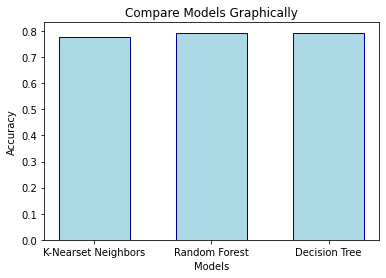

In [182]:
# Visualisation for prediction with parameters on accuracy
accuracy = []
name = []
for k,r in classification_results.items():
    name.append(k)
    accuracy.append(r['ac'])
print(accuracy)
print(name)

fig, ax = plt.subplots(facecolor='w')
ax.bar(name, accuracy, 
       color = 'lightblue',
       edgecolor = 'darkblue',
       width =0.6)
ax.autoscale(enable=True) 
ax.set(title = "Compare Models Graphically",
       xlabel = "Models",
       ylabel = "Accuracy")
plt.show()

In [183]:
!jupyter nbconvert  --to html 'drive/My Drive/Colab Notebooks/Domain Name Prediction System.ipynb'

[NbConvertApp] Converting notebook drive/My Drive/Colab Notebooks/Domain Name Prediction System.ipynb to html
[NbConvertApp] Writing 536750 bytes to drive/My Drive/Colab Notebooks/Domain Name Prediction System.html
